In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-60.92724059100476, -25.125167621944655),
 (6.197520194831753, -59.10639330456972),
 (-39.565147649637765, 57.09821434077989),
 (-30.32817983471015, -53.79776545295154),
 (-48.948984590275316, 83.15391965111223),
 (6.320647735077287, -64.28985526219346),
 (-76.04578180440112, -40.510367176535254),
 (-27.947180150115436, -72.79153153899),
 (-1.246632975442509, 37.251916840525865),
 (80.19528516951942, -151.8858741747655),
 (-20.43309358973707, 27.75429720033091),
 (89.64099939959806, 12.976743889395351),
 (13.12544072862103, -67.96564552443627),
 (-59.332798618922524, 26.26296483226554),
 (10.119694868581036, 85.72086632940437),
 (-13.753519430112036, 62.67860853277159),
 (-31.56723138724533, 89.52357595600319),
 (86.67534467095766, 55.52067004853802),
 (-22.775835779551926, -26.80620029371667),
 (47.732425149255675, 62.770203016413944),
 (27.572587928560154, -21.93130090780707),
 (-35.84248898795666, 13.387285130727832),
 (62.369189686140885, -5.076376668194797),
 (-53.24488836006894

In [5]:
pip install citipy

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [8]:
cities

['chuy',
 'bartica',
 'taolanaro',
 'sao sepe',
 'busselton',
 'ciudad bolivar',
 'ushuaia',
 'vallenar',
 'kangundo',
 'barrow',
 'masunga',
 'barentsburg',
 'rincon',
 'kruisfontein',
 'batticaloa',
 'grand gaube',
 'carnarvon',
 'belushya guba',
 'caravelas',
 'kazalinsk',
 'los llanos de aridane',
 'saldanha',
 'klaksvik',
 'hithadhoo',
 'southbridge',
 'mulege',
 'mataura',
 'miramar',
 'ribeira grande',
 'kailua',
 'kapaa',
 'pisco',
 'butaritari',
 'yurla',
 'rikitea',
 'grand river south east',
 'pauini',
 'vaini',
 'beroroha',
 'visby',
 'goderich',
 'inverness',
 'hermanus',
 'ponta do sol',
 'okha',
 'mys shmidta',
 'hobart',
 'port hedland',
 'tiksi',
 'pangody',
 'narsaq',
 'hofn',
 'khatanga',
 'guerrero negro',
 'kaiserslautern',
 'avarua',
 'hasaki',
 'shenjiamen',
 'port-cartier',
 'albany',
 'makakilo city',
 'manoel urbano',
 'fortuna',
 'mubende',
 'nove mesto na morave',
 'torbay',
 'vaitupu',
 'terra santa',
 'caiaponia',
 'awjilah',
 'atuona',
 'chokurdakh',
 'ca

In [9]:
import requests


In [10]:
conda install -c conda-forge requests

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [11]:
# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d5ea3cb53e6ed4c59cc0e64aea22fc0


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | bartica
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | sao sepe
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | ciudad bolivar
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | vallenar
Processing Record 9 of Set 1 | kangundo
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | masunga
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | rincon
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | batticaloa
Processing Record 16 of Set 1 | grand gaube
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | caravelas
Processing Record 20 of Set 1 | kazalinsk
City not found. Skipping...


Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | merauke
Processing Record 41 of Set 4 | tsumeb
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | santa rosa
Processing Record 45 of Set 4 | bikaner
Processing Record 46 of Set 4 | pailon
Processing Record 47 of Set 4 | vigrestad
Processing Record 48 of Set 4 | kurilsk
Processing Record 49 of Set 4 | fort nelson
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | asfi
Processing Record 2 of Set 5 | tuktoyaktuk
Processing Record 3 of Set 5 | marzuq
Processing Record 4 of Set 5 | inuvik
Processing Record 5 of Set 5 | port antonio
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | nanortalik
Processing Record 9 of Set 5 | manakara
Processing Record 10 of Set 5 | esperance
Processing Record 11 of Set 5 | vila
Processing Record 12 of Set 5 | nar

Processing Record 30 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | zachepylivka
Processing Record 33 of Set 8 | praia da vitoria
Processing Record 34 of Set 8 | qeshm
Processing Record 35 of Set 8 | ugoofaaru
Processing Record 36 of Set 8 | ipoti
Processing Record 37 of Set 8 | san cristobal
Processing Record 38 of Set 8 | mitu
Processing Record 39 of Set 8 | bejar
Processing Record 40 of Set 8 | yamada
Processing Record 41 of Set 8 | oktyabrskiy
Processing Record 42 of Set 8 | takanabe
Processing Record 43 of Set 8 | dwarka
Processing Record 44 of Set 8 | dawlatabad
Processing Record 45 of Set 8 | swidnik
Processing Record 46 of Set 8 | beringovskiy
Processing Record 47 of Set 8 | carolina
Processing Record 48 of Set 8 | aksarayskiy
Processing Record 49 of Set 8 | orange
Processing Record 50 of Set 8 | imeni poliny osipenko
Processing Record 1 of Set 9 | saint augustine
Processing Record 2 of Set 9 | suao
City 

Processing Record 19 of Set 12 | bose
Processing Record 20 of Set 12 | bambolim
Processing Record 21 of Set 12 | gobabis
Processing Record 22 of Set 12 | ahuimanu
Processing Record 23 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 24 of Set 12 | luau
Processing Record 25 of Set 12 | comodoro rivadavia
Processing Record 26 of Set 12 | tateyama
Processing Record 27 of Set 12 | atar
Processing Record 28 of Set 12 | mandan
Processing Record 29 of Set 12 | zaozerne
Processing Record 30 of Set 12 | rudbar
Processing Record 31 of Set 12 | dicabisagan
Processing Record 32 of Set 12 | timizart
Processing Record 33 of Set 12 | pyshma
Processing Record 34 of Set 12 | airai
Processing Record 35 of Set 12 | mae ramat
Processing Record 36 of Set 12 | ayan
Processing Record 37 of Set 12 | rabo de peixe
Processing Record 38 of Set 12 | temaraia
City not found. Skipping...
Processing Record 39 of Set 12 | trairi
Processing Record 40 of Set 12 | tocopilla
Processing Record 41 of S

In [15]:
len(city_data)

574

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,65.43,95,15,7.74,UY,2021-02-18 02:15:36
1,Bartica,6.4000,-58.6167,73.40,94,20,6.91,GY,2021-02-18 02:15:36
2,Sao Sepe,-30.1606,-53.5653,66.20,88,0,1.14,BR,2021-02-18 02:15:37
3,Busselton,-33.6500,115.3333,64.99,60,8,5.99,AU,2021-02-18 02:15:37
4,Ciudad Bolivar,8.1222,-63.5497,80.26,47,15,15.32,VE,2021-02-18 02:15:37
5,Ushuaia,-54.8000,-68.3000,51.80,87,75,3.44,AR,2021-02-18 02:12:58
6,Vallenar,-28.5708,-70.7581,60.55,70,0,1.90,CL,2021-02-18 02:15:37
7,Kangundo,-1.2979,37.3471,58.10,89,100,2.71,KE,2021-02-18 02:15:37
8,Barrow,71.2906,-156.7887,-20.20,69,1,9.22,US,2021-02-18 02:15:37
9,Masunga,-20.6246,27.4488,63.28,88,78,2.71,BW,2021-02-18 02:15:37


In [17]:
new_column_order = ["City","Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2021-02-18 02:15:36,-33.6971,-53.4616,65.43,95,15,7.74
1,Bartica,GY,2021-02-18 02:15:36,6.4000,-58.6167,73.40,94,20,6.91
2,Sao Sepe,BR,2021-02-18 02:15:37,-30.1606,-53.5653,66.20,88,0,1.14
3,Busselton,AU,2021-02-18 02:15:37,-33.6500,115.3333,64.99,60,8,5.99
4,Ciudad Bolivar,VE,2021-02-18 02:15:37,8.1222,-63.5497,80.26,47,15,15.32


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

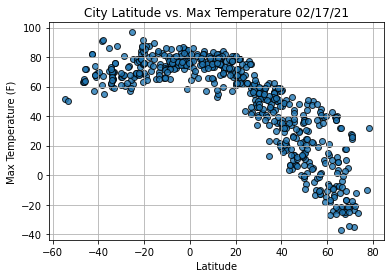

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

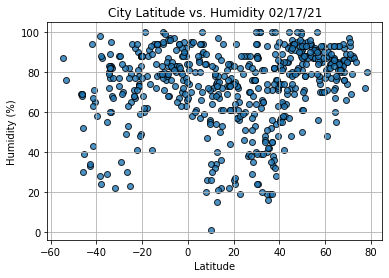

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

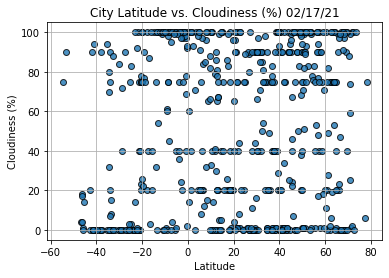

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

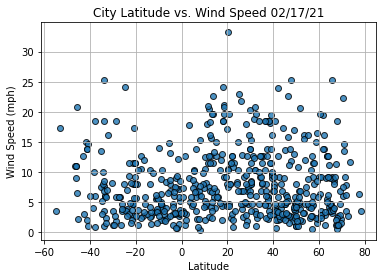

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()